# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print(brain_name)
print(brain)

ReacherBrain
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]
print(env_info.agents)

[922]


In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -6.30408478e+00  -1.00000000e+00
  -4.92529202e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -5.33014059e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1 
     
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

1) define DDPG agent class

2) define agent learning function

    (a) run learning function
         1. initialize critic network, and actor
         2. initialize critic target network, and target actor with same weights
         3. Initialize Buffer
         4. FOR episodes = 1:M
              initialize random process (...)
              reset environment (receive initial observation state s_1)
             4.1. FOR t = 1:T
                     select action a_t = mu(s_t | theta_mu) + N_t   w/ current policy & exploration noise
                     execute action a_t, observe reward r_t and new state s_t+1
                     store (s,a,r,s') in buffer
                     sample random minibatch of N transitions from buffer
                     set y_i = r_i + gamma * Q'(s_i+1, mu'(s_i+1|theta_mu')|theta_Q')
                     update critic by minimizing the loss L = 1/N (sum (y_i - Q(s_i, a_i | theta_Q))^2
                     update the actor policy using the sampled policy gradient:
                     update the target networks (slow update)
             end
          end
 
    (b) stop when solved or max_episodes
3) plot results

In [9]:
import time

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent

import workspace_utils
from workspace_utils import active_session

agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)

Episode 10	Average Score: 0.65	Score: 1.15
140.9143545627594
Episode 10	Average Score: 0.65
Episode 20	Average Score: 1.15	Score: 4.03
145.29720830917358
Episode 20	Average Score: 1.15
Episode 30	Average Score: 1.80	Score: 3.70
145.75216221809387
Episode 30	Average Score: 1.80
Episode 40	Average Score: 2.08	Score: 3.08
147.86066794395447
Episode 40	Average Score: 2.08
Episode 50	Average Score: 2.38	Score: 1.61
147.2088258266449
Episode 50	Average Score: 2.38
Episode 60	Average Score: 2.53	Score: 2.70
148.7502932548523
Episode 60	Average Score: 2.53
Episode 70	Average Score: 2.75	Score: 5.69
149.16985654830933
Episode 70	Average Score: 2.75
Episode 80	Average Score: 2.86	Score: 2.99
150.51255130767822
Episode 80	Average Score: 2.86
Episode 90	Average Score: 2.87	Score: 1.95
150.97041821479797
Episode 90	Average Score: 2.87
Episode 100	Average Score: 2.92	Score: 3.30
152.13324666023254
Episode 100	Average Score: 2.92
Episode 110	Average Score: 3.14	Score: 2.64
152.036372423172
Episode 11

Episode 880	Average Score: 0.80	Score: 1.09
152.40413808822632
Episode 880	Average Score: 0.80
Episode 890	Average Score: 0.82	Score: 1.37
151.79999446868896
Episode 890	Average Score: 0.82
Episode 900	Average Score: 0.86	Score: 1.83
154.07683897018433
Episode 900	Average Score: 0.86
Episode 910	Average Score: 0.87	Score: 0.83
154.66107058525085
Episode 910	Average Score: 0.87
Episode 920	Average Score: 0.90	Score: 1.17
154.89975786209106
Episode 920	Average Score: 0.90
Episode 930	Average Score: 0.94	Score: 1.75
156.544536113739
Episode 930	Average Score: 0.94
Episode 940	Average Score: 1.02	Score: 0.74
153.92050051689148
Episode 940	Average Score: 1.02
Episode 950	Average Score: 1.01	Score: 0.00
154.04089260101318
Episode 950	Average Score: 1.01
Episode 960	Average Score: 1.00	Score: 0.78
154.436927318573
Episode 960	Average Score: 1.00
Episode 970	Average Score: 0.97	Score: 1.47
154.13790321350098
Episode 970	Average Score: 0.97
Episode 980	Average Score: 1.00	Score: 1.54
153.775698

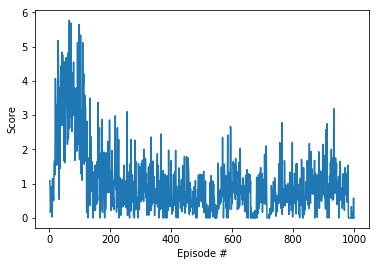

In [10]:
def ddpg(n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    cur_time = time.time()
    for i_episode in range(1, n_episodes+1):
        ##state = env.reset()
        ##agent.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            
            ##next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 10 == 0:
                        
            elapsed = time.time() - cur_time 
            print("")
            print(elapsed)
            cur_time = time.time() 
            
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        if np.mean(scores_deque) >= 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print("solved!")
            break
 
    return scores


with active_session():
    scores = ddpg()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show() 
    
    np.savetxt("foo.csv", scores, delimiter=",")